# **Tarea 9** - Modelos de Python a TensorFlow.js

**USA TUS MODELOS DE TENSORFLOW REALIZADOS EN PYTHON EN PÁGINAS WEB**

1. **(4 Puntos)** Realiza la tarea de implementar un modelo para convertir temperaturas de grados Fahrenheit a centígrados. Expórtalo a Tensorflow.js e implementa la aplicación web para que use el modelo.
  
  Descarga la función de conversión y genera el dataset .csv con al menos 1000 temperaturas.
  
  Divide los datos en 80% training y 20% test. Los datos de trainning reserva un 5% para 
validación.
  
  Muestra las gráficas de pérdida y precisión.

2. **(6 Puntos)** Descarga el data set de flores de:

  https://www.kaggle.com/datasets/imsparsh/flowers-dataset?resource=download

  Implementa en Python el modelo de red convolucional que clasifique correctamente las flores, expórtalo y úsalo en una aplicación web en la que se seleccionará una imagen e indicará su nombre.

  Referencias:
    
    - https://www.youtube.com/watch?v=JpE4bYyRADI
    
    - https://www.smashingmagazine.com/2019/09/machine-learning-front-end-developers-tensorflowjs/

Se subirá un único archivo **PDF** con el enunciado y código en un notebook de Jupyter que incluya capturas de ejecución y 
conclusiones.

Se valorará las medidas de regularización, y precisión obtenida.

# 1. Modelo de conversión de temperaturas

In [ ]:
# Instalación de la librería tensorflow.js
!pip install tensorflowjs -q

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers, models, optimizers
from google.colab import files

## Generación de datos de temperatura en Fahrenheit y Celsius

In [ ]:
# Creación de un array con 10000 números aleatorios entre -100 y 100 con dos decimales de precisión
fahrenheit = np.round(np.random.uniform(-100, 100, 20000), 2)

# Conversión de Fahrenheit a Celsius usando la fórmula correspondiente
celsius = np.round((fahrenheit - 32) * 5/9, 2)

# Impresión de los primeros 10 valores de cada array
print('Fahrenheit:', fahrenheit[:10])
print('Celsius:', celsius[:10])

Fahrenheit: [ 39.84  59.66 -31.94 -94.18  92.89  79.93 -63.13 -98.29  21.99  60.71]
Celsius: [  4.36  15.37 -35.52 -70.1   33.83  26.63 -52.85 -72.38  -5.56  15.95]


## División de los datos de temperatura en conjuntos de entrenamiento, validación y prueba

In [ ]:
# División de los datos en conjuntos de entrenamiento y prueba con una proporción de 80:20
X_train, X_test, y_train, y_test = train_test_split(fahrenheit, celsius, test_size=0.2, random_state=42)

# División adicional del conjunto de entrenamiento en conjuntos de entrenamiento y validación con una proporción de 95:5
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

La división de los datos en conjuntos diferentes es crucial para la evaluación del rendimiento del modelo y la prevención del sobreajuste, lo que puede suceder si el modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a datos nuevos.

## Entrenamiento del Modelo

In [ ]:
# Definición del número de épocas y del batch size para el entrenamiento
epochs = 20
batch_size = 8

# Definición del modelo de red neuronal
model = models.Sequential()
model.add(layers.Dense(32, input_shape=[1,], activation='relu'))
model.add(layers.Dense(1))

# Compilación del modelo especificando la función de pérdida, el optimizador y las métricas
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo con los datos de entrenamiento y validación
print("Comenzando entrenamiento...")
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
print("¡Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/20
1900/1900 [==============================] - 4s 2ms/step - loss: 110.1904 - mae: 7.0679 - val_loss: 13.6131 - val_mae: 3.0235
Epoch 2/20
1900/1900 [==============================] - 4s 2ms/step - loss: 2.2953 - mae: 0.9524 - val_loss: 0.1373 - val_mae: 0.3079
Epoch 3/20
1900/1900 [==============================] - 6s 3ms/step - loss: 0.0376 - mae: 0.1359 - val_loss: 0.0063 - val_mae: 0.0459
Epoch 4/20
1900/1900 [==============================] - 6s 3ms/step - loss: 0.0036 - mae: 0.0347 - val_loss: 0.0021 - val_mae: 0.0279
Epoch 5/20
1900/1900 [==============================] - 8s 4ms/step - loss: 0.0046 - mae: 0.0407 - val_loss: 5.3885e-04 - val_mae: 0.0132
Epoch 6/20
1900/1900 [==============================] - 5s 2ms/step - loss: 0.0201 - mae: 0.0498 - val_loss: 3.2518e-04 - val_mae: 0.0072
Epoch 7/20
1900/1900 [==============================] - 4s 2ms/step - loss: 0.0158 - mae: 0.0301 - val_loss: 2.8481e-04 - val_mae: 0.0074
Epoch 8/20
1900/190

La función de pérdida, el optimizador y las métricas especificadas durante la compilación se utilizan para ajustar los parámetros del modelo durante el entrenamiento y mejorar su capacidad para predecir la salida celsius a partir de la entrada fahrenheit.

## Evaluación del Modelo

In [ ]:
# Evaluación del modelo con los datos de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

125/125 - 0s - loss: 6.9978e-05 - mae: 0.0058 - 246ms/epoch - 2ms/step


Evalua la capacidad del modelo de generalizar a nuevos datos que no se utilizaron durante el entrenamiento. La evaluación del modelo con los datos de prueba proporciona una estimación objetiva de su rendimiento en el mundo real.

### Gráficos del historial de evaluación del modelo

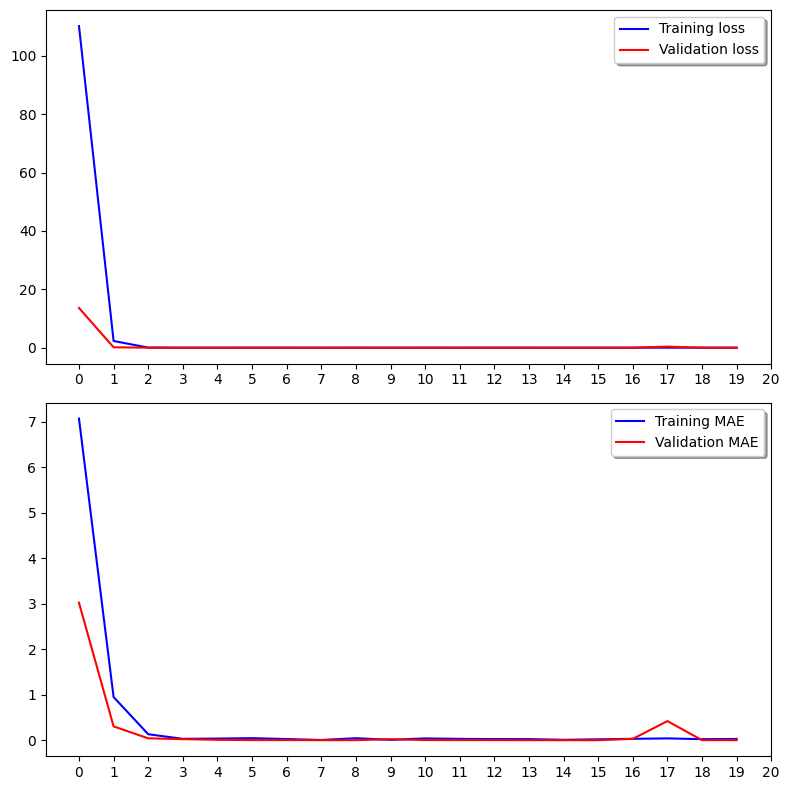

In [ ]:
# Creación de la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

# Graficación de la pérdida durante el entrenamiento y la validación
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(epochs + 1))
ax1.legend(loc='best', shadow=True)

# Graficación del error absoluto medio (MAE) durante el entrenamiento y la validación
ax2.plot(history.history['mae'], color='b', label="Training MAE")
ax2.plot(history.history['val_mae'], color='r',label="Validation MAE")
ax2.set_xticks(np.arange(epochs + 1))
ax2.legend(loc='best', shadow=True)

# Ajuste de la figura para evitar solapamientos y mostrar los gráficos de forma clara
plt.tight_layout()

# Muestra los gráficos
plt.show()

- **El primer gráfico (ax1)**, traza la curva de pérdida del modelo durante el entrenamiento (color azul) y durante la validación (color rojo) en función del número de épocas. La pérdida es una medida del error entre las predicciones del modelo y los valores reales. Durante el entrenamiento, el objetivo es minimizar la pérdida para mejorar la precisión del modelo.

 Es útil para visualizar cómo el modelo aprende durante el entrenamiento y la validación, lo que puede ayudar a identificar problemas en el modelo y ajustar los parámetros del mismo. Además, también puede ser utilizado para comparar diferentes modelos y elegir el mejor.

- **El segundo gráfico (ax2)**, traza la curva del error absoluto medio (MAE) del modelo durante el entrenamiento (color azul) y durante la validación (color rojo) en función del número de épocas. El MAE es una medida de la diferencia promedio entre las predicciones del modelo y los valores reales.

 Es útil para visualizar cómo el modelo aprende durante el entrenamiento y la validación en términos de su capacidad para predecir valores precisos. El uso del MAE como métrica de evaluación es común en problemas de regresión, ya que proporciona una medida de cuán lejos están las predicciones del valor real. La visualización del MAE durante el entrenamiento y la validación puede ayudar a identificar problemas en el modelo, como un sobreajuste o un subajuste, y ajustar los parámetros del modelo para mejorar su rendimiento. Además, también puede ser utilizado para comparar diferentes modelos y elegir el mejor en términos de su capacidad para predecir valores precisos.

## Predicción del modelo

In [ ]:
# Predicción de las temperaturas en Celsius con los datos de prueba
prediccion = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


La comparación entre las predicciones y los valores reales de los datos de prueba puede proporcionar una idea del rendimiento del modelo en situaciones del mundo real.

In [ ]:
y_test

array([ -2.04,  -8.39, -41.9 , ..., -22.93, -39.63,  31.38])

In [ ]:
prediccion

array([[ -2.0430536],
       [ -8.3921585],
       [-41.89819  ],
       ...,
       [-22.924076 ],
       [-39.62574  ],
       [ 31.374443 ]], dtype=float32)

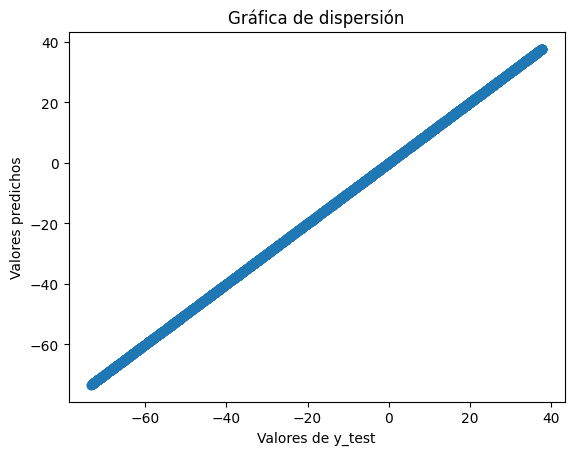

In [ ]:
# Creación de la gráfica de dispersión
plt.scatter(y_test, prediccion)

# Etiquetas y título de la gráfica
plt.xlabel('Valores de y_test')
plt.ylabel('Valores predichos')
plt.title('Gráfica de dispersión')

# Muestra la gráfica
plt.show()

La **gráfica de dispersión** puede proporcionar una idea de la precisión y el sesgo del modelo en la tarea de predicción.

Es una representación visual que se utiliza para mostrar la relación entre dos variables continuas. En este tipo de gráfico, cada punto representa una observación o un par de valores (x,y) de las dos variables.

Se utilizan para visualizar las predicciones del modelo versus los valores verdaderos. Esto permite evaluar la precisión del modelo y entender mejor su desempeño. En resumen, las gráficas de dispersión son una herramienta útil para visualizar y analizar datos en diferentes áreas y contextos, incluyendo el aprendizaje automático.


## Exportación del Modelo

In [ ]:
# Guarda el modelo en formato h5
model.save('model.h5')

# Creación de la carpeta para los archivos resultantes
!mkdir output

# Conversión del modelo a formato TensorFlow.js
# Y exportarción a la carpeta de salida
!tensorflowjs_converter --input_format keras model.h5 output

# Confirmación de que se hayan generado los archivos en la carpeta de salida
!ls output

# Descarga los archivos generados
files.download('output/model.json')
files.download('output/group1-shard1of1.bin')

mkdir: cannot create directory ‘output’: File exists
2023-05-07 13:03:09.988129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
group1-shard1of1.bin  model.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exporta el modelo entrenado en formato Keras a un formato compatible con TensorFlow.js, lo que permite utilizar el modelo en aplicaciones web y en navegadores.

## Aplicación web

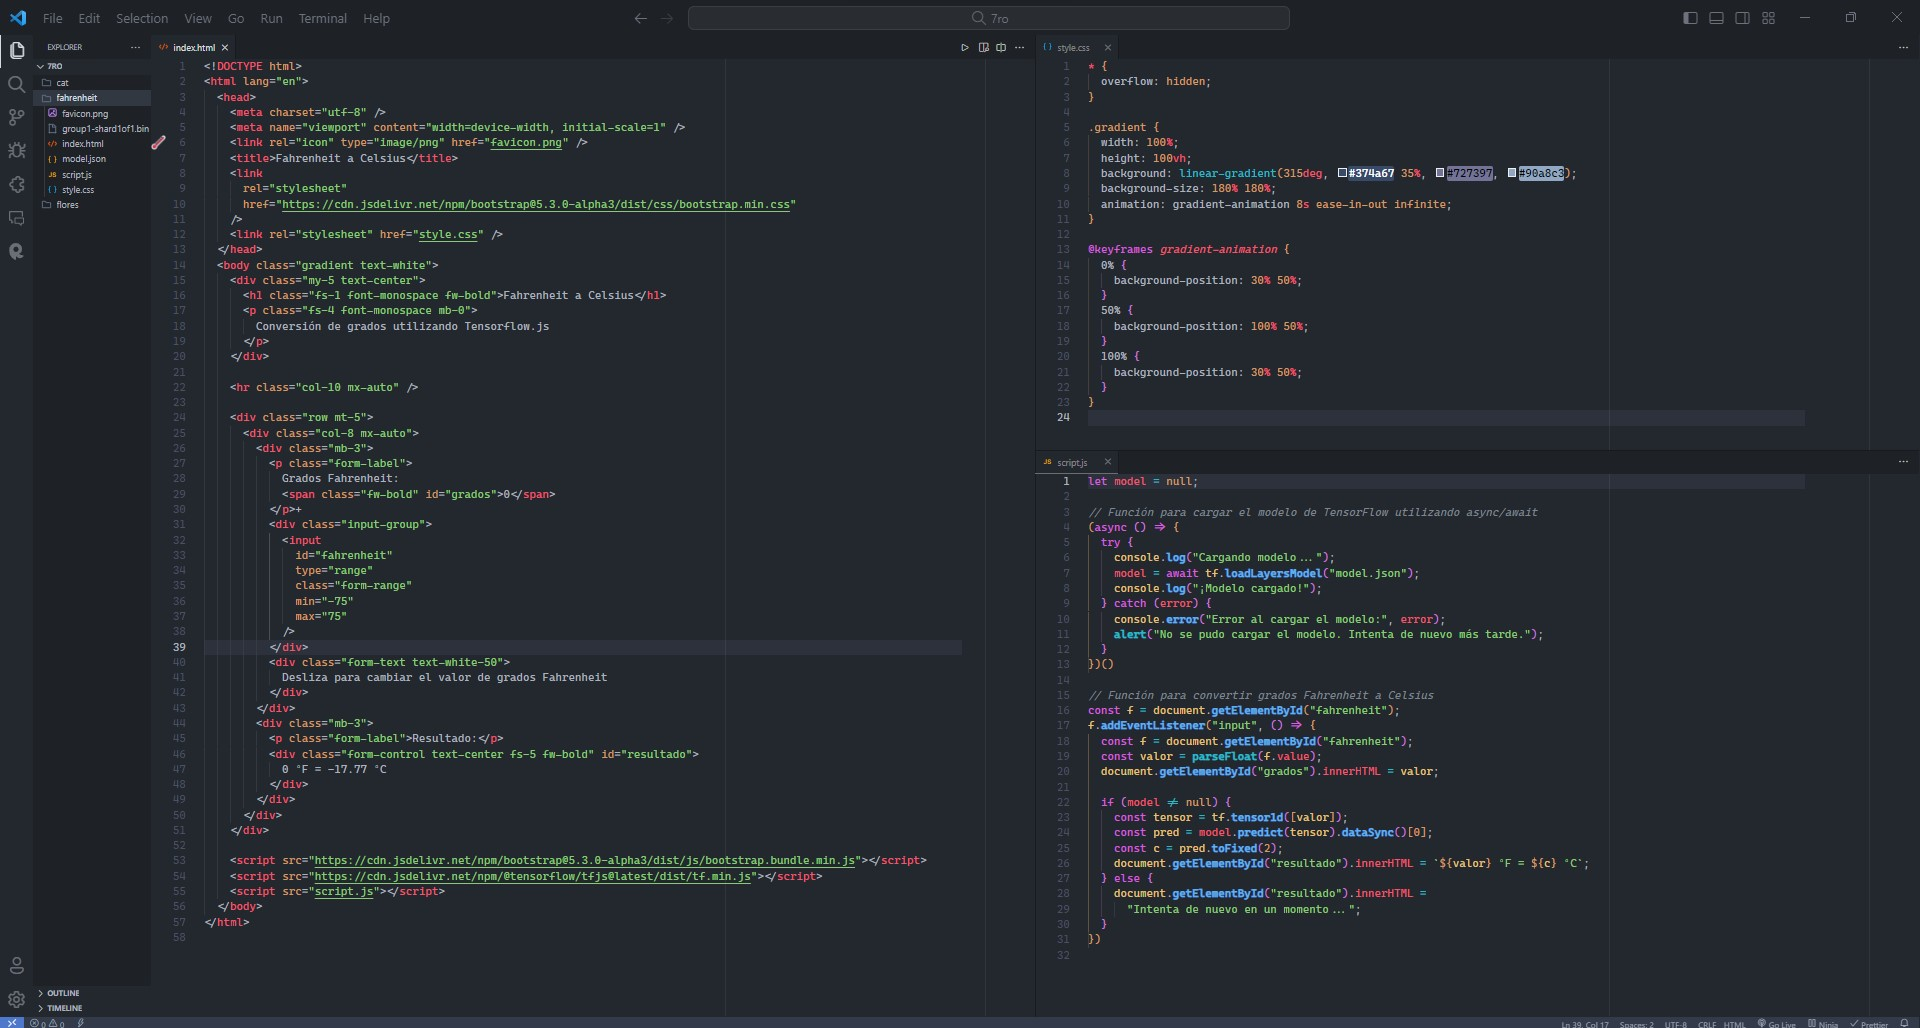

| | |
|:---:|:---:|
|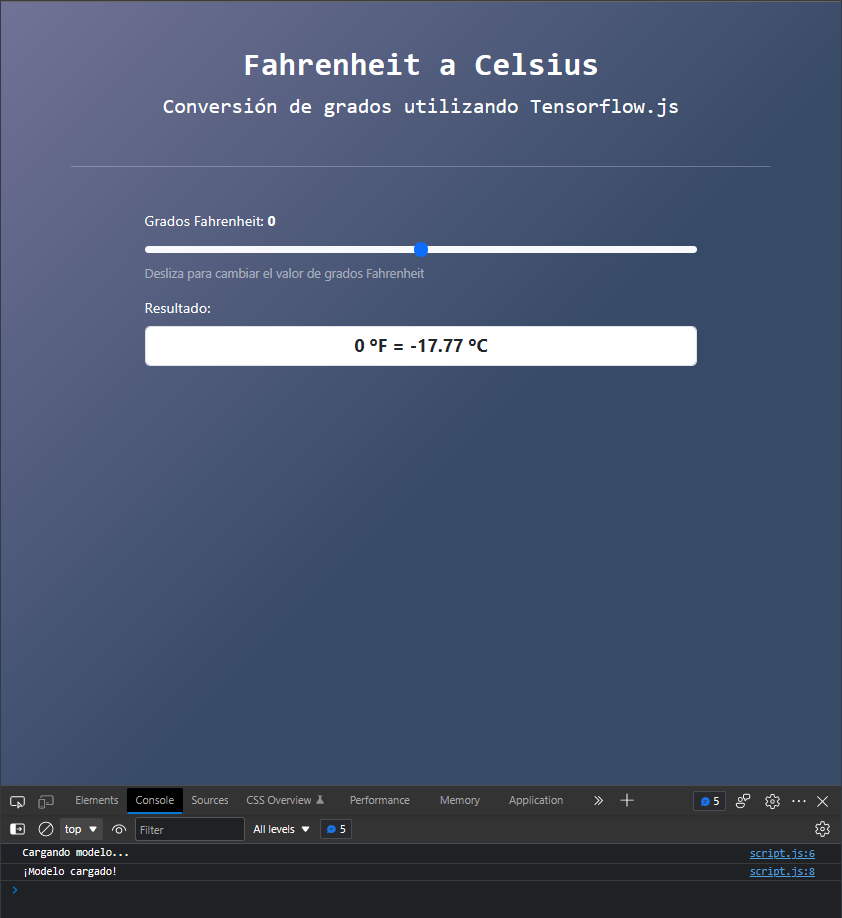|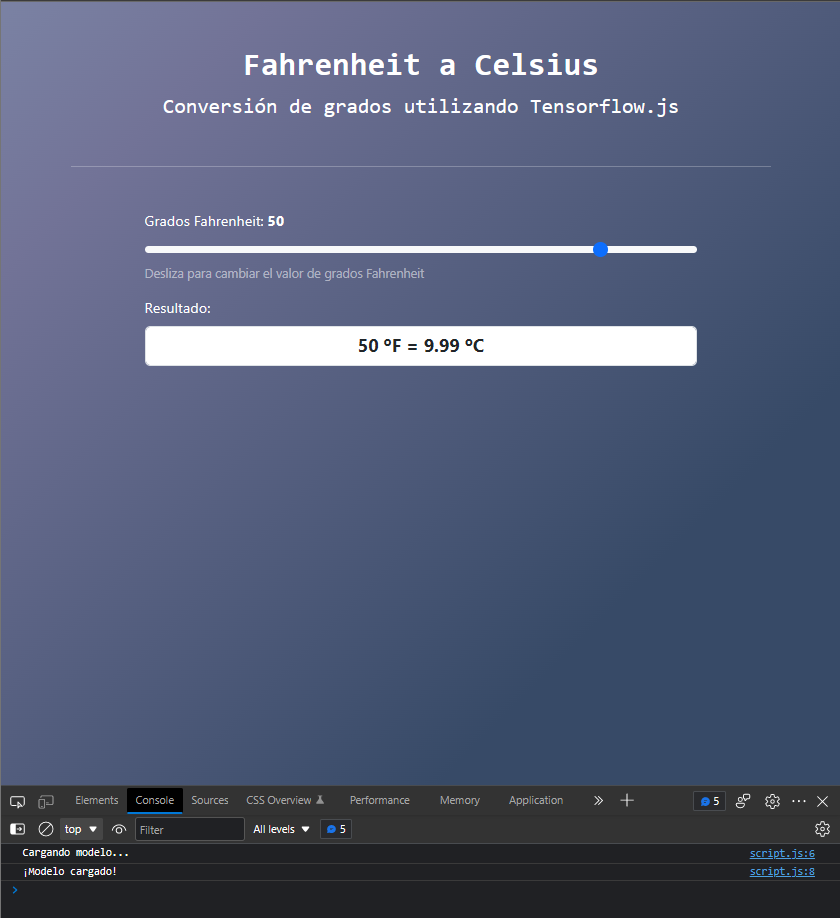|

## Conclusión

En conclusión, se ha desarrollado un modelo de red neuronal de regresión para convertir temperaturas de Fahrenheit a Celsius con una evaluación satisfactoria. 

El modelo ha sido entrenado con éxito y se ha logrado un bajo error de pérdida (loss) de 6.9978e-05 y un error absoluto medio (MAE) de 0.0058. Estos resultados indican que el modelo es altamente preciso, como puede observarse en las imágenes anteriores, en la conversión de temperaturas.

# 2. Modelo de clasificación de flores

## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob

In [ ]:
# Montar el Google Drive en Colab
# Esto permite acceder a los archivos del Drive desde Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mapeo de número de clase a nombres de flores
# Cada número del 0 al 4 representa una flor específica.
MAP_FLOWERS = { 0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

# Tamaño estándar para las imágenes
# Todas las imágenes se redimensionarán a 64x64 píxeles
IMG_SIZE = 64

In [ ]:
def load_train_set(dirname, map_flowers, verbose=True):
  """
  Esta función carga los datos de training en imágenes.
  
  Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
  para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
  Args:
    dirname: directorio completo del que leer los datos
    map_flowers: variable de mapeo entre labels y personajes
    verbose: si es True, muestra información de las imágenes cargadas
     
  Returns:
    X, y: X es un array con todas las imágenes cargadas con tamaño
    IMG_SIZE x IMG_SIZE y es un array con las labels de correspondientes a cada imagen
  """
  X_train = []
  y_train = []
  for label, character in map_flowers.items():        
    files = os.listdir(os.path.join(dirname, character))
    images = [file for file in files if file.endswith("jpg")]
    if verbose:
      print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
    for image_name in images:
      image = cv2.imread(os.path.join(dirname, character, image_name))
      X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
      y_train.append(label)
  return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_flowers, verbose=True):
  """
  Esta función funciona de manera equivalente a la función load_train_set
  pero cargando los datos de test.
  """
  X_test = []
  images = [file for file in glob.glob(dirname + '/*.*') if file.endswith("jpg")]
  print("Leídas {} imágenes de test".format(len(images)))
  for image_name in images:
    image = cv2.imread(image_name)
    X_test.append(cv2.resize(image, (IMG_SIZE, IMG_SIZE)))
  return np.array(X_test)

In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/content/drive/MyDrive/Colab Notebooks/7RO - Programación de inteligencia artificial/flores/train"
DATASET_TEST_PATH_COLAB = "/content/drive/MyDrive/Colab Notebooks/7RO - Programación de inteligencia artificial/flores/test"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_FLOWERS)
X_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_FLOWERS)

Leyendo 501 imágenes encontradas de daisy
Leyendo 646 imágenes encontradas de dandelion
Leyendo 497 imágenes encontradas de rose
Leyendo 499 imágenes encontradas de sunflower
Leyendo 607 imágenes encontradas de tulip
Leídas 925 imágenes de test


### Generación aleatoria de la carga de datos

In [ ]:
# Permutación aleatoria de los datos
# Esto es importante para evitar sesgos en la selección del conjunto de validación.
# Si seleccionamos el 20% de los datos finales como conjunto de validación
# sin barajar los datos, estaremos utilizando solo un pequeño número de flores,
# ya que las imágenes se leen secuencialmente flor a flor.

perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Importación de librerías

In [ ]:
# Importación de Librerías

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models, optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Preprocesamiento de datos de imágenes: normalización y conversión de etiquetas de clase

In [ ]:
# Normalización de los valores de píxeles de las imágenes 
X, X_t = X / 255.0, X_t / 255.0

# Conversión de las etiquetas de clase en vectores de una sola activación
y = to_categorical(y)

In [ ]:
# Tamaño de la matriz X:
# - Número de imágenes en el conjunto de datos
# - Dimensiones 2 y 3, resolución en píxeles que tiene cada imagen
# - Valores de intensidad de los componentes rojo, verde y azul (RGB)

X.shape

(2750, 64, 64, 3)

In [ ]:
# Tamaño de la matriz y:
# - Número de imágenes en el conjunto de datos
# - Número de clases en el conjunto de datos

y.shape

(2750, 5)

## Entrenamiento del Modelo

In [ ]:
# Hiperparámetros del modelo
# - input_shape: forma de los datos de entrada
# - num_classes: número de clases que hay en el problema de clasificación
# - epochs: número de veces que se pasa por todo el conjunto de entrenamiento
# - batch_size: número de muestras que se usan en cada actualización de los pesos del modelo

input_shape = (64, 64, 3) # Imágenes de 64x64 píxeles con 3 canales de color
num_classes = len(MAP_FLOWERS)
epochs = 20
batch_size = 64

In [ ]:
# División de los datos en entrenamiento y validación
# - test_size: proporción de datos que se asigna al conjunto de validación
# - random_state: valor para inicializar el generador de números aleatorios que determina la forma de dividir los datos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de Red Neuronal Convolucional (CNNs)
# - Conv2D: Capa convolucional
# - MaxPooling2D: Agrupación máxima, reduce el tamaño de la salida de la capa anterior y elimina información redundante
# - BatchNormalization: Normalización por lotes, estandariza los valores de entrada y acelera el entrenamiento
# - Flatten: Aplana la salida de la última capa convolucional en un vector unidimensional
# - Dropout: Apaga aleatoriamente un porcentaje de las unidades del vector anterior para evitar el sobreajuste
# - Dense: capa densamente conectada
# - ReLU (rectified linear unit): máximo entre cero y el valor de entrada
# - Softmax: distribución de probabilidad sobre las clases de salida

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

Este código define un modelo de red neuronal convolucional (CNN) para el reconocimiento de imágenes. Ya que permite capturar características y patrones relevantes de las imágenes, reduciendo su dimensionalidad antes de pasarlas a una capa densa que realiza la clasificación final.

In [ ]:
# Compilación del modelo
# - optimizer='adam': adapta automáticamente la tasa de aprendizaje durante el entrenamiento
# - loss='categorical_crossentropy': entropía cruzada categórica, comúnmente utilizada en la clasificación de múltiples clases
# - metrics=['accuracy']: (precisión), mide la proporción de muestras clasificadas correctamente

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Instancia de ImageDataGenerator para data augmentation
# - Generador de datos de imágenes que aplica transformaciones aleatorias a las imágenes de entrenamiento 
#   para aumentar la variedad y evitar el sobreajuste. Los parámetros indican el rango de rotación, desplazamiento, 
#   corte, zoom y volteo horizontal que se pueden aplicar a las imágenes.

train_datagen = ImageDataGenerator(
  rotation_range=20, 
  width_shift_range=0.2,
  height_shift_range=0.2, 
  shear_range=0.2,
  zoom_range=0.2, 
  horizontal_flip=True
)

El código muestra la creación de un objeto ImageDataGenerator de Keras para realizar aumentación de datos en un conjunto de imágenes durante el entrenamiento de una red neuronal convolucional.

La idea detrás de la aumentación de datos es proporcionar variaciones artificiales en los datos de entrenamiento para que la red neuronal pueda generalizar mejor y evitar el sobreajuste. Al aplicar transformaciones aleatorias a las imágenes originales, se obtiene un conjunto de imágenes de entrenamiento más diverso y grande sin tener que recopilar nuevos datos.

In [ ]:
# Entrenamiento del modelo con data augmentation
# - epochs: número de veces que se pasa por todo el conjunto de entrenamiento
# - batch_size: número de muestras que se usan en cada actualización de los pesos del modelo
# - validation_data: conjunto de datos para evaluar la pérdida y las métricas del modelo al final de cada época

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
history = model.fit(train_generator, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
35/35 [==============================] - 53s 1s/step - loss: 1.4836 - accuracy: 0.4645 - val_loss: 1.5899 - val_accuracy: 0.2164
Epoch 2/20
35/35 [==============================] - 52s 1s/step - loss: 1.2212 - accuracy: 0.5514 - val_loss: 1.7449 - val_accuracy: 0.2036
Epoch 3/20
35/35 [==============================] - 48s 1s/step - loss: 1.0821 - accuracy: 0.6005 - val_loss: 2.0330 - val_accuracy: 0.2036
Epoch 4/20
35/35 [==============================] - 49s 1s/step - loss: 1.0751 - accuracy: 0.5945 - val_loss: 1.7039 - val_accuracy: 0.2055
Epoch 5/20
35/35 [==============================] - 47s 1s/step - loss: 1.0252 - accuracy: 0.6186 - val_loss: 2.0775 - val_accuracy: 0.2091
Epoch 6/20
35/35 [==============================] - 49s 1s/step - loss: 0.9759 - accuracy: 0.6405 - val_loss: 1.9150 - val_accuracy: 0.2418
Epoch 7/20
35/35 [==============================] - 48s 1s/step - loss: 0.9321 - accuracy: 0.6514 - val_loss: 2.0757 - val_accuracy: 0.2091
Epoch 8/20
35/35 [==

### Gráficos del historial de evaluación del modelo

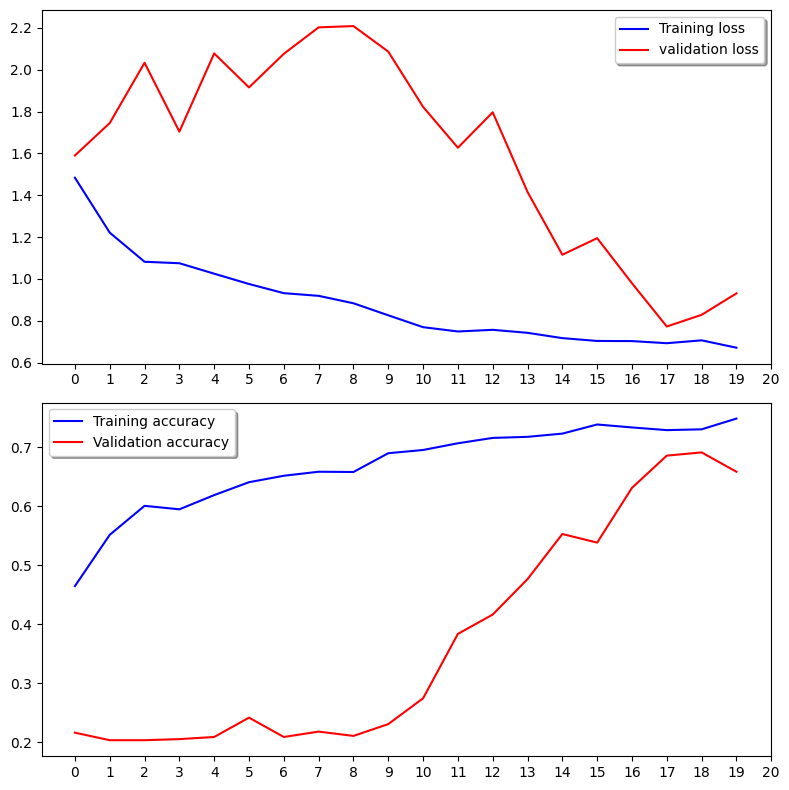

In [ ]:
# El primer gráfico (ax1), traza la curva de pérdida del modelo durante el entrenamiento (color azul) 
# y durante la validación (color rojo) en función del número de épocas. 
# La pérdida es una medida del error del modelo que se quiere minimizar. 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(epochs + 1))
ax1.legend(loc='best', shadow=True)

# El segundo gráfico (ax2), traza la curva de precisión del modelo durante el entrenamiento (color azul)
# y durante la validación (color rojo) en función del número de épocas. 
# La precisión es la fracción de predicciones correctas del modelo que se quiere maximizar.

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(epochs + 1))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Predicción del Modelo

In [ ]:
# Predicción con los datos de test
prediccion = model.predict(X_t)

29/29 [==============================] - 11s 395ms/step


In [ ]:
np.argmax(prediccion, axis=1)

array([0, 3, 3, 0, 3, 0, 1, 1, 2, 1, 1, 4, 3, 2, 1, 1, 0, 1, 2, 3, 0, 3,
       3, 2, 1, 3, 3, 0, 3, 1, 1, 1, 4, 0, 4, 2, 1, 1, 4, 2, 2, 2, 3, 4,
       3, 4, 1, 3, 1, 1, 2, 3, 3, 1, 4, 3, 1, 1, 3, 4, 1, 4, 3, 1, 1, 3,
       3, 3, 1, 3, 4, 2, 4, 1, 1, 1, 2, 1, 2, 4, 1, 4, 3, 1, 4, 1, 1, 2,
       4, 2, 1, 2, 1, 4, 4, 2, 1, 2, 1, 1, 1, 4, 2, 3, 4, 1, 4, 4, 4, 0,
       4, 0, 4, 4, 1, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 2, 1, 4, 1, 3, 1, 2,
       0, 1, 1, 3, 1, 2, 2, 4, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3,
       3, 0, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 1, 3, 4,
       1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 0, 3, 4, 2, 3, 3, 4, 1, 3, 4, 0, 1,
       1, 3, 0, 2, 3, 3, 3, 2, 0, 1, 1, 3, 3, 1, 4, 3, 2, 2, 2, 1, 4, 2,
       4, 1, 0, 4, 2, 1, 4, 3, 3, 0, 1, 2, 4, 3, 1, 2, 4, 2, 4, 1, 1, 0,
       1, 1, 0, 3, 1, 1, 2, 2, 2, 2, 3, 4, 1, 3, 1, 4, 3, 4, 4, 1, 4, 1,
       1, 1, 3, 4, 0, 2, 3, 0, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 4, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 1, 2,

In [ ]:
for flower in np.argmax(prediccion, axis=1):
  print(MAP_FLOWERS[flower])

daisy
sunflower
sunflower
daisy
sunflower
daisy
dandelion
dandelion
rose
dandelion
dandelion
tulip
sunflower
rose
dandelion
dandelion
daisy
dandelion
rose
sunflower
daisy
sunflower
sunflower
rose
dandelion
sunflower
sunflower
daisy
sunflower
dandelion
dandelion
dandelion
tulip
daisy
tulip
rose
dandelion
dandelion
tulip
rose
rose
rose
sunflower
tulip
sunflower
tulip
dandelion
sunflower
dandelion
dandelion
rose
sunflower
sunflower
dandelion
tulip
sunflower
dandelion
dandelion
sunflower
tulip
dandelion
tulip
sunflower
dandelion
dandelion
sunflower
sunflower
sunflower
dandelion
sunflower
tulip
rose
tulip
dandelion
dandelion
dandelion
rose
dandelion
rose
tulip
dandelion
tulip
sunflower
dandelion
tulip
dandelion
dandelion
rose
tulip
rose
dandelion
rose
dandelion
tulip
tulip
rose
dandelion
rose
dandelion
dandelion
dandelion
tulip
rose
sunflower
tulip
dandelion
tulip
tulip
tulip
daisy
tulip
daisy
tulip
tulip
dandelion
rose
rose
rose
daisy
dandelion
dandelion
rose
daisy
sunflower
daisy
rose
dan

## Exportación del Modelo

In [ ]:
# Guarda el modelo en formato h5
model.save('flower.h5')

# Creación de la carpeta para los archivos resultantes
!mkdir output2

# Conversión del modelo a formato TensorFlow.js
# Y exportarción a la carpeta de salida
!tensorflowjs_converter --input_format keras flower.h5 output2

# Confirmación de que se hayan generado los archivos en la carpeta de salida
!ls output2

# Descarga los archivos generados
files.download('output2/model.json')
files.download('output2/group1-shard1of1.bin')

2023-05-07 16:23:52.292135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
group1-shard1of1.bin  model.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aplicación web

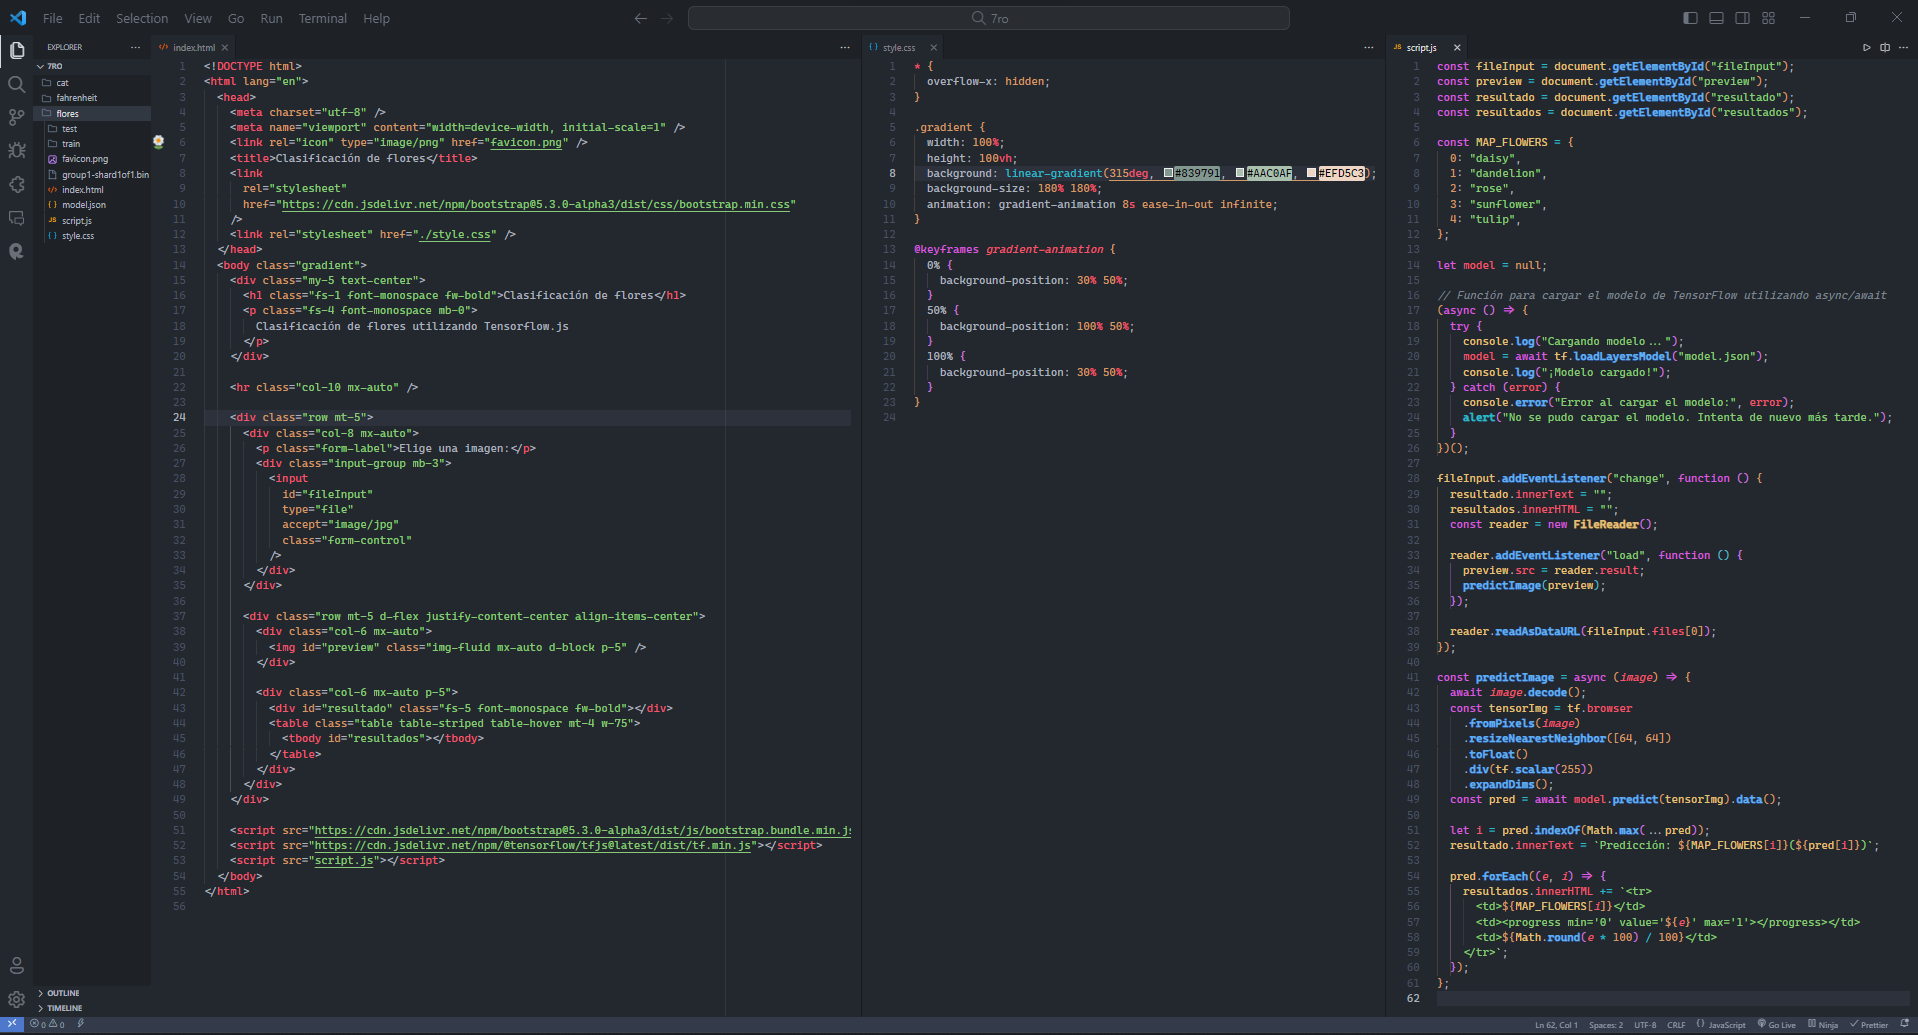

| | |
|:---:|:---:|
| 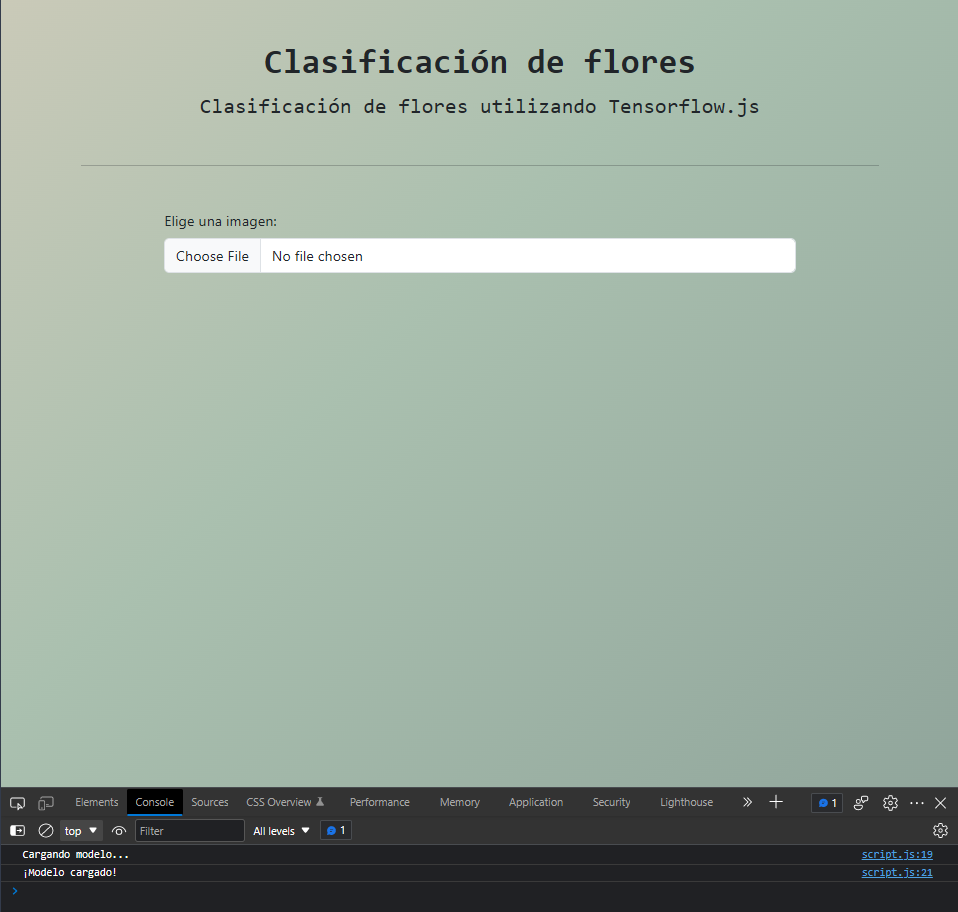 | 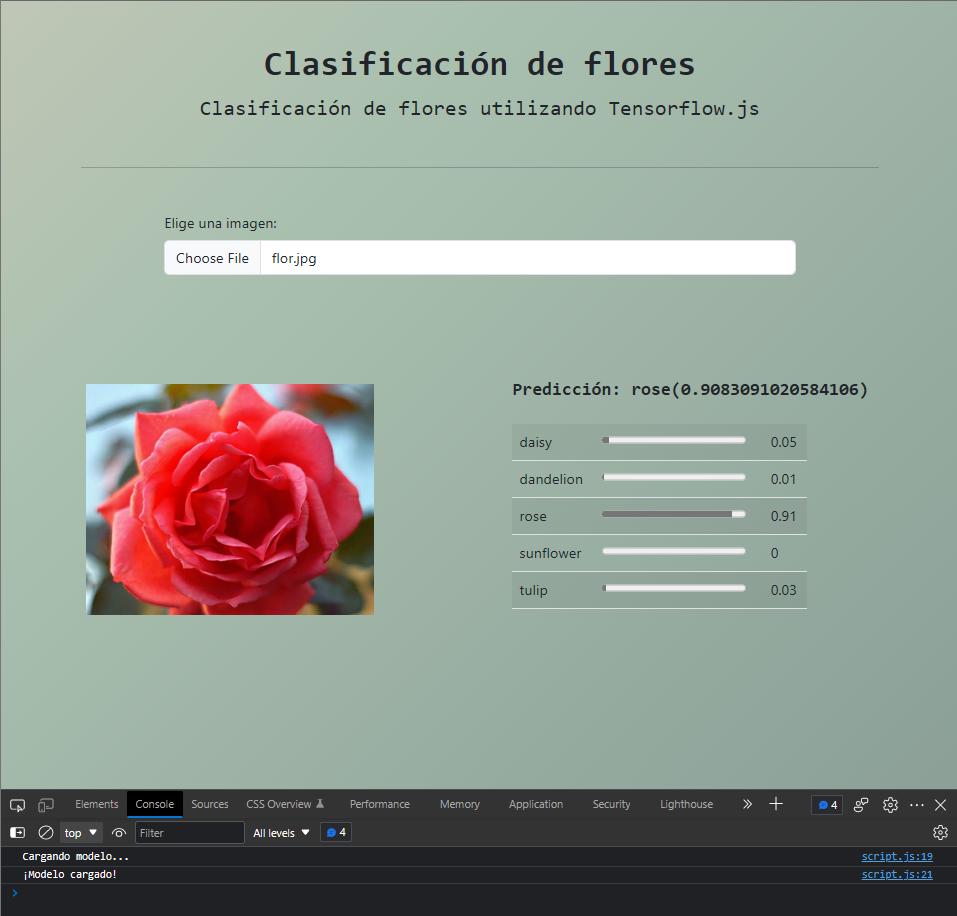 |

## Conclusión


En resumen, se ha desarrollado un modelo de red neuronal convolucional para clasificar flores con una evaluación satisfactoria. El modelo ha sido entrenado con éxito y ha obtenido una pérdida (loss) de 0.6715 y una precisión (accuracy) de 0.7482 en el conjunto de entrenamiento. Además, en el conjunto de validación, el modelo ha obtenido una pérdida (val_loss) de 0.9310 y una precisión (val_accuracy) de 0.6582. Estos resultados indican que el modelo tiene una precisión razonablemente buena y es capaz de clasificar las flores con una buena tasa de éxito.